In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from sklearn import preprocessing
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report

In [2]:
%cd /content/drive/MyDrive/새싹_인공지능SW교육/프로젝트/새싹_최종프로젝트/tree_chatbot/intent_classfiy_test

train_data = pd.read_csv('./data/csv/intent_train_korean_data.csv',encoding='cp949')
test_data = pd.read_csv('./data/csv/intent_test_korean_data.csv',encoding='cp949')

/content/drive/MyDrive/새싹_인공지능SW교육/프로젝트/새싹_최종프로젝트/tree_chatbot/intent_classfiy_test


In [3]:
train_data

,intent,label
0,크리스마스에 4명 7시에 예약되나요?,예약
1,오늘 밤 9시에 #이름#로 2명 예약해 주실래요?,예약
2,오후 8시에 4명 예약해주세요.,예약
3,예약을 12월 1일에 하려고 하는데 가능한가요?,예약
4,내일 저녁에 2인 예약이 됩니까?,예약
...,...,...
85,차 어디다가 대면 돼요?,주차안내
86,주차장 어디있어요?,주차안내
87,지금 다왔는데 주차 공간 따로 있죠?,주차안내
88,저 거의 다왔는데 주차 어디다가 해요?,주차안내


In [4]:
test_data

,intent,label
0,오늘 저녁에 예약 되죠?,예약
1,저 예약좀 하려고요,예약
2,5월 13일 예약하려고요,예약
3,다음주 목요일 예약 되나요?,예약
4,오후 3시에 6명 예약이요,예약
5,혹시 보통 몇시에 마감하나요?,영업시간
6,아침에 몇시쯤 오픈하죠?,영업시간
7,런치타임이 언제부터인가요?,영업시간
8,영업시간좀 알려주세요,영업시간
9,주말에 몇시에 오픈하나요?,영업시간


In [5]:
intent_train = train_data['intent'].tolist()
label_train = train_data['label'].tolist()
intent_test = test_data['intent'].tolist()
label_test = test_data['label'].tolist()

print('훈련용 문장의 수 :', len(intent_train))
print('훈련용 레이블의 수 :', len(label_train))
print('테스트용 문장의 수 :', len(intent_test))
print('테스트용 레이블의 수 :', len(label_test))

훈련용 문장의 수 : 90
훈련용 레이블의 수 : 90
테스트용 문장의 수 : 15
테스트용 레이블의 수 : 15


In [6]:
print(intent_train[:5])
print(label_train[:5])

['크리스마스에 4명 7시에 예약되나요?', '오늘 밤 9시에 #이름#로 2명 예약해 주실래요?', '오후 8시에 4명 예약해주세요.', '예약을 12월 1일에 하려고 하는데 가능한가요?', '내일 저녁에 2인 예약이 됩니까?']
['예약', '예약', '예약', '예약', '예약']


In [7]:
print(intent_train[30:35])
print(label_train[30:35])

['혹시 몇시까지 하나요?', '오늘 몇시에 여나요?', '오늘 가게 언제 오픈하나요?', '혹시 몇시에 마감하나요?', '저녁 몇시까지 장사하시나요?']
['영업시간', '영업시간', '영업시간', '영업시간', '영업시간']


In [8]:
print(intent_train[60:65])
print(label_train[60:65])

['혹시 주차 어디다 하면 되나요?', '주차장이 어디인가요?', '주차장 있는걸로 알고 있는데 어딘가요?', '주차 몇시까지 무료인가요?', '주차하려면 어디로 가면 되나요?']
['주차안내', '주차안내', '주차안내', '주차안내', '주차안내']


<AxesSubplot:>

/usr/local/lib/python3.8/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 50557 (\N{HANGUL SYLLABLE YAG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 50689 (\N{HANGUL SYLLABLE YEONG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 50629 (\N{HANGUL SYLLABLE EOB}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  func(*args, **

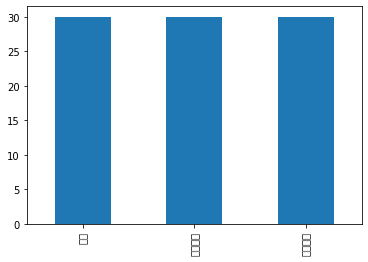

In [9]:
train_data['label'].value_counts().plot(kind = 'bar')

In [10]:
# 레이블 인코딩. 레이블에 고유한 정수를 부여
idx_encode = preprocessing.LabelEncoder()
idx_encode.fit(label_train)

label_train = idx_encode.transform(label_train) # 주어진 고유한 정수로 변환
label_test = idx_encode.transform(label_test) # 고유한 정수로 변환

label_idx = dict(zip(list(idx_encode.classes_), idx_encode.transform(list(idx_encode.classes_))))
print('레이블과 정수의 맵핑 관계 :',label_idx)

레이블과 정수의 맵핑 관계 : {'영업시간': 0, '예약': 1, '주차안내': 2}


In [11]:
print(intent_train[:5])
print(label_train[:5])

['크리스마스에 4명 7시에 예약되나요?', '오늘 밤 9시에 #이름#로 2명 예약해 주실래요?', '오후 8시에 4명 예약해주세요.', '예약을 12월 1일에 하려고 하는데 가능한가요?', '내일 저녁에 2인 예약이 됩니까?']
[1 1 1 1 1]


In [12]:
print(intent_test[:5])
print(label_test[:5])

['오늘 저녁에 예약 되죠?', '저 예약좀 하려고요', '5월 13일 예약하려고요', '다음주 목요일 예약 되나요?', '오후 3시에 6명 예약이요']
[1 1 1 1 1]


In [13]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(intent_train)
sequences = tokenizer.texts_to_sequences(intent_train)
sequences[:5] # 상위 5개 샘플 출력

[[79, 11, 80, 49],
 [12, 81, 35, 82, 83, 84, 85, 86],
 [3, 16, 11, 17],
 [50, 51, 52, 87, 88, 18],
 [6, 13, 53, 36, 89]]

In [14]:
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
print('단어 집합(Vocabulary)의 크기 :',vocab_size)

단어 집합(Vocabulary)의 크기 : 169


문장의 최대 길이 : 8
문장의 평균 길이 : 4.166666666666667


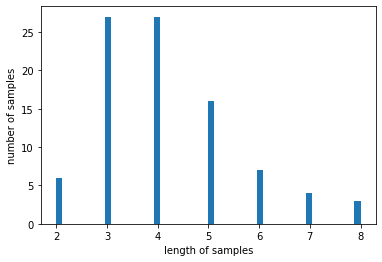

In [15]:
print('문장의 최대 길이 :',max(len(l) for l in sequences))
print('문장의 평균 길이 :',sum(map(len, sequences))/len(sequences))
plt.hist([len(s) for s in sequences], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [16]:
max_len = 8

intent_train = pad_sequences(sequences, maxlen = max_len)
label_train = to_categorical(np.asarray(label_train))
print('훈련 데이터의 크기(shape):', intent_train.shape)
print('훈련 데이터 레이블의 크기(shape):', label_train.shape)

훈련 데이터의 크기(shape): (90, 8)
훈련 데이터 레이블의 크기(shape): (90, 3)


In [17]:
print('훈련 데이터의 첫번째 샘플 :',intent_train[0])
print('훈련 데이터의 첫번째 샘플의 레이블 :',label_train[0])

훈련 데이터의 첫번째 샘플 : [ 0  0  0  0 79 11 80 49]
훈련 데이터의 첫번째 샘플의 레이블 : [0. 1. 0.]


In [65]:
# 결과 분석

analyze_tokenizer = Tokenizer()
analyze_intent_train = train_data['intent'].tolist()
analyze_tokenizer.fit_on_texts(analyze_intent_train)
analyze_sequences = analyze_tokenizer.texts_to_sequences(analyze_intent_train)

analyze_word_index = analyze_tokenizer.word_index
analyze_vocab_size = len(analyze_word_index) + 1

max_len = 8
print(analyze_word_index)

for i in range(len(analyze_intent_train)):
  print(analyze_intent_train[i])
  print(analyze_sequences[i])

  tokenized_word = []

  # for index in analyze_sequences[i]:
  for key,value in analyze_word_index.items() :
    if value in analyze_sequences[i]:
      tokenized_word.append(key)
  print(tokenized_word)

{'되나요': 1, '몇시까지': 2, '오후': 3, '있나요': 4, '몇시에': 5, '내일': 6, '주차': 7, '수': 8, '주차장': 9, '따로': 10, '4명': 11, '오늘': 12, '저녁에': 13, '혹시': 14, '여나요': 15, '8시에': 16, '예약해주세요': 17, '가능한가요': 18, '10명': 19, '저녁': 20, '있죠': 21, '10월': 22, '예약': 23, '가게': 24, '오픈하나요': 25, '어떻게': 26, '갈껀데': 27, '몇시부터': 28, '어디다': 29, '주차장이': 30, '어디인가요': 31, '공간': 32, '돼요': 33, '차': 34, '9시에': 35, '예약이': 36, '지금': 37, '있을까요': 38, '예약할': 39, '하나요': 40, '마감하나요': 41, '시간이': 42, '보통': 43, '하시나요': 44, '하면': 45, '주차할': 46, '곳': 47, '어디다가': 48, '예약되나요': 49, '예약을': 50, '12월': 51, '1일에': 52, '2인': 53, '11월': 54, '예약하려고': 55, '해요': 56, '이번주': 57, '금요일': 58, '1시에': 59, '두': 60, '명': 61, '3인': 62, '예약할게요': 63, '6시에': 64, '26일': 65, '점심': 66, '장사하시나요': 67, '점심에': 68, '것': 69, '같은데': 70, '영업': 71, '런치타임인가요': 72, '어디로': 73, '근처에': 74, '차댈': 75, '어디에': 76, '대면': 77, '다왔는데': 78, '크리스마스에': 79, '7시에': 80, '밤': 81, '이름': 82, '로': 83, '2명': 84, '예약해': 85, '주실래요': 86, '하려고': 87, '하는데': 88, '됩니까': 89, '단체예약': 90, '할': 91, '예약해도': 92, '2

In [18]:
indices = np.arange(intent_train.shape[0])
np.random.shuffle(indices)
print('랜덤 시퀀스 :',indices)

랜덤 시퀀스 : [ 3 41  1 53 78 76 55 74 33 25 10 48 36 18 40 20  0 81 38 42 58 37 35 71
 69 89 29 50 88  4  6 34 62 17  5 87 66 83 14 31 51 64 79 16 65 56 75 60
 85 22 11 70  9 49 63 45 61 26  2 21 52 44 24 86 28 54 72 39 46  7 84  8
 32 68 67 57 23 82 77 12 13 73 30 43 80 19 27 59 15 47]


In [19]:
intent_train = intent_train[indices]
label_train = label_train[indices]

In [20]:
n_of_val = int(0.1 * intent_train.shape[0])
print('검증 데이터의 개수 :',n_of_val)

검증 데이터의 개수 : 9


In [21]:
X_train = intent_train[:-n_of_val]
y_train = label_train[:-n_of_val]
X_val = intent_train[-n_of_val:]
y_val = label_train[-n_of_val:]
X_test = intent_test
y_test = label_test

In [22]:
print('훈련 데이터의 크기(shape):', X_train.shape)
print('검증 데이터의 크기(shape):', X_val.shape)
print('훈련 데이터 레이블의 크기(shape):', y_train.shape)
print('검증 데이터 레이블의 크기(shape):', y_val.shape)
print('테스트 데이터의 개수 :', len(X_test))
print('테스트 데이터 레이블의 개수 :', len(y_test))

훈련 데이터의 크기(shape): (81, 8)
검증 데이터의 크기(shape): (9, 8)
훈련 데이터 레이블의 크기(shape): (81, 3)
검증 데이터 레이블의 크기(shape): (9, 3)
테스트 데이터의 개수 : 15
테스트 데이터 레이블의 개수 : 15


In [23]:
# 임베딩 모델
# https://monetd.github.io/python/nlp/Word-Embedding-Word2Vec-%EC%8B%A4%EC%8A%B5/

# import gensim
# model = gensim.models.Word2Vec.load('./embedding_model/ko/ko.bin')

In [ ]:
# !pip install tqdm
%cd /content/drive/MyDrive/새싹_인공지능SW교육/프로젝트/새싹_최종프로젝트/tree_chatbot/intent_classfiy_test

import tqdm
import os
import numpy as np

f1 = open(os.path.join('./embedding_model/ko/ko.tsv'), encoding='utf-8')

embedding_dict = dict()
one_word_vectors_list = []

line_cnt = 0
word_num = 0

for line in f1:
  line_cnt +=1

  # print(line.split("\t")[0])

  if str(word_num) == line.split("\t")[0]:
    first_line_tab = line.split("\t")
    word = first_line_tab[1]

    print(word)
    
    first_line_spc = line.split()
    # print(first_line_spc[2])
    # print(first_line_spc[3])

    if "[" == first_line_spc[2]:
      first_line_spc = first_line_spc[3:]
    elif "[" in first_line_spc[2]:
      first_line_spc[2] = first_line_spc[2].replace("[","")
      first_line_spc = first_line_spc[2:]
    one_word_vectors_list += first_line_spc
    
    # print(one_word_vectors_list)
  
  else:
    middle_lines_spc = line.split()

    one_word_vectors_list += middle_lines_spc

    if len(one_word_vectors_list) > 198:
      # print(one_word_vectors_list[-1])
      if "]" in one_word_vectors_list[-1]:
        last_vector = one_word_vectors_list[-1]
        one_word_vectors_list[-1] = last_vector.replace("]","")
        
      if '' == one_word_vectors_list[-1]:
        # print("마지막이 빈칸임 ")
        # print(middle_lines_spc)
        one_word_vectors_list = one_word_vectors_list[:200]
    
      word_num += 1

      if len(one_word_vectors_list) !=200:
        print(len(one_word_vectors_list))
        print(one_word_vectors_list)
      one_word_vectors_list_arr = np.asarray(one_word_vectors_list, dtype='float32')
      embedding_dict[word] = one_word_vectors_list_arr
      one_word_vectors_list = []

    # print(middle_lines_spc)

    # one_word_vectors_list += middle_lines_spc

f1.close()

print(len(embedding_dict.keys()))


In [25]:
len(embedding_dict.keys())

30185

In [26]:
len(embedding_dict.values())

30185

In [27]:
len(embedding_dict['개미'])

200

In [28]:
avg = 0
sum_len_values = 0
for key in embedding_dict.keys():
  value = embedding_dict[key]
  vector_dim = len(value)
  if vector_dim != 200:
    print(key)
  sum_len_values += vector_dim

avg = sum_len_values/len(embedding_dict.keys())
avg

200.0

In [29]:
embedding_dict['취업']

array([ 4.99932081e-01,  6.53207779e-01, -4.09506500e-01, -4.59465981e-01,
       -8.61228287e-01, -6.51582539e-01, -1.36124814e+00, -6.91259429e-02,
       -1.41855344e-01, -1.11809358e-01,  1.70425165e+00, -1.10269733e-01,
        6.22673184e-02, -4.51010704e-01, -3.95967484e-01, -5.40185571e-01,
        7.38630950e-01, -8.21655989e-01, -1.00052428e+00,  1.27429128e+00,
        1.79003048e+00,  9.44524407e-02, -1.15868342e+00, -1.05924487e+00,
       -1.98641911e-01, -2.04680371e+00,  6.17662966e-01,  5.91993511e-01,
       -1.06639620e-02, -1.66136166e-03, -1.47659159e+00, -2.03108549e+00,
       -4.92827296e-01,  1.00794874e-01, -8.38817358e-02, -1.50954711e+00,
        1.94749880e+00, -9.48408484e-01,  1.61057174e+00,  5.65186799e-01,
        9.56309021e-01, -9.16930139e-01, -3.52838933e-01,  3.56126189e-01,
       -3.47185552e-01,  1.09436482e-01,  1.13941705e+00, -6.68196082e-01,
        7.37339735e-01, -8.89944494e-01, -1.14905342e-01,  1.46006003e-01,
       -3.60071510e-01, -

In [30]:
%cd /content/drive/MyDrive/새싹_인공지능SW교육/프로젝트/새싹_최종프로젝트/tree_chatbot/intent_classfiy_test

import pandas as pd

korean_embedding_vector = pd.read_csv("./data/csv/korean_embedding_vector.csv", encoding="utf-8")
korean_embedding_vector.head()

/content/drive/MyDrive/새싹_인공지능SW교육/프로젝트/새싹_최종프로젝트/tree_chatbot/intent_classfiy_test


,Unnamed: 0,word,embedding_data
0,1,하,[ 1.2513299 -0.7913604 -1.7325785 -0.102565...
1,2,이,[-0.09237527 -0.5477274 0.30446327 -2.184154...
2,3,ㄴ,[ 1.3803720e-01 -5.0465461e-02 -2.1609845e+00 ...
3,4,의,[-0.3887475 -1.0758348 0.2270551 0.325715...
4,5,는,[ 0.01761385 0.83592516 -0.29051858 -0.168648...


In [31]:
index = 0

for key in embedding_dict.keys():
  index +=1
  korean_embedding_vector.loc[index,'word'] = key
  korean_embedding_vector.loc[index,'embedding_data'] = embedding_dict[key]

ValueError: ignored

In [ ]:
korean_embedding_vector.head()

In [ ]:
korean_embedding_vector.to_csv("./data/csv/korean_embedding_vector.csv")

In [32]:
# 차원은 200

embedding_dim = 200
embedding_matrix = np.zeros((vocab_size, embedding_dim))
print('임베딩 테이블의 크기(shape) :',np.shape(embedding_matrix))

임베딩 테이블의 크기(shape) : (169, 200)


In [33]:
for word, i in word_index.items():
    embedding_vector = embedding_dict.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [34]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Embedding, Dropout, Conv1D, GlobalMaxPooling1D, Dense, Input, Flatten, Concatenate

kernel_sizes = [2, 3, 5]
num_filters = 512
dropout_ratio = 0.5

model_input = Input(shape=(max_len,))
output = Embedding(vocab_size, embedding_dim, weights=[embedding_matrix],
                      input_length=max_len, trainable=False)(model_input)

conv_blocks = []

for size in kernel_sizes:
    conv = Conv1D(filters=num_filters,
                         kernel_size=size,
                         padding="valid",
                         activation="relu",
                         strides=1)(output)
    conv = GlobalMaxPooling1D()(conv)
    conv_blocks.append(conv)

output = Concatenate()(conv_blocks) if len(conv_blocks) > 1 else conv_blocks[0]
output = Dropout(dropout_ratio)(output)
model_output = Dense(len(label_idx), activation='softmax')(output)
model = Model(model_input, model_output)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 embedding (Embedding)          (None, 8, 200)       33800       ['input_1[0][0]']                
                                                                                                  
 conv1d (Conv1D)                (None, 7, 512)       205312      ['embedding[0][0]']              
                                                                                                  
 conv1d_1 (Conv1D)              (None, 6, 512)       307712      ['embedding[0][0]']              
                                                                                              

In [35]:
history = model.fit(X_train, y_train,
          batch_size=64,
          epochs=10,
          validation_data=(X_val, y_val))

Epoch 1/10
2/2 [==============================] - 11s 452ms/step - loss: 1.4223 - acc: 0.3333 - val_loss: 0.5783 - val_acc: 0.7778
Epoch 2/10
2/2 [==============================] - 0s 35ms/step - loss: 0.5728 - acc: 0.7778 - val_loss: 0.4938 - val_acc: 0.7778
Epoch 3/10
2/2 [==============================] - 0s 32ms/step - loss: 0.4334 - acc: 0.7778 - val_loss: 0.5015 - val_acc: 0.7778
Epoch 4/10
2/2 [==============================] - 0s 33ms/step - loss: 0.3131 - acc: 0.8272 - val_loss: 0.5613 - val_acc: 0.7778
Epoch 5/10
2/2 [==============================] - 0s 33ms/step - loss: 0.3051 - acc: 0.8889 - val_loss: 0.6523 - val_acc: 0.7778
Epoch 6/10
2/2 [==============================] - 0s 33ms/step - loss: 0.2822 - acc: 0.9136 - val_loss: 0.7431 - val_acc: 0.7778
Epoch 7/10
2/2 [==============================] - 0s 33ms/step - loss: 0.2763 - acc: 0.9012 - val_loss: 0.7451 - val_acc: 0.7778
Epoch 8/10
2/2 [==============================] - 0s 32ms/step - loss: 0.2470 - acc: 0.9136 - v

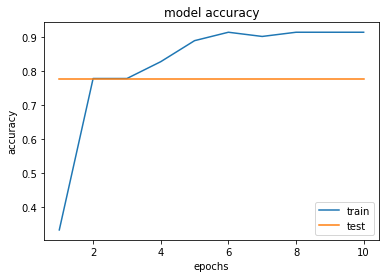

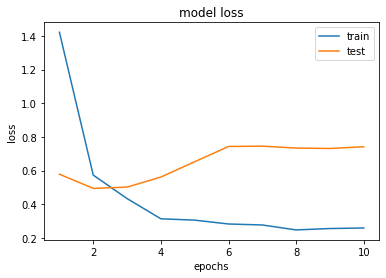

In [36]:
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['acc'])
plt.plot(epochs, history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

epochs = range(1, len(history.history['loss']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [37]:
X_test = tokenizer.texts_to_sequences(X_test)
X_test = pad_sequences(X_test, maxlen=max_len)

In [38]:
y_predicted = model.predict(X_test)
y_predicted = y_predicted.argmax(axis=-1) # 예측을 정수 시퀀스로 변환
X_test, y_predicted

1/1 [==============================] - 0s 172ms/step


(array([[  0,   0,   0,   0,   0,  12,  13,  23],
        [  0,   0,   0,   0,   0,   0,   0, 165],
        [  0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0, 103,  23,   1],
        [  0,   0,   0,   0,   0,   0,   3, 115],
        [  0,   0,   0,   0,  14,  43,   5,  41],
        [  0,   0,   0,   0,   0,   0, 125, 121],
        [  0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0, 168],
        [  0,   0,   0,   0,   0, 118,   5,  25],
        [  0,   0,   0,   0,   0,  24,   9,  21],
        [  0,   0,   0,   0, 151, 152,   9,  31],
        [  0,   0,   0,   0,   0,   0,  34,  77],
        [  0,   0,   0,   0,   0,   0,   0,   9],
        [  0,   0,   0,   0, 147,  73, 148,  33]], dtype=int32),
 array([0, 2, 1, 1, 1, 0, 1, 1, 1, 1, 0, 2, 2, 2, 2]))

In [39]:
print('정확도(Accuracy) : ', sum(y_predicted == y_test) / len(y_test))

정확도(Accuracy) :  0.5333333333333333


In [44]:
X_test, y_predicted, y_test

(array([[  0,   0,   0,   0,   0,  12,  13,  23],
        [  0,   0,   0,   0,   0,   0,   0, 165],
        [  0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0, 103,  23,   1],
        [  0,   0,   0,   0,   0,   0,   3, 115],
        [  0,   0,   0,   0,  14,  43,   5,  41],
        [  0,   0,   0,   0,   0,   0, 125, 121],
        [  0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0, 168],
        [  0,   0,   0,   0,   0, 118,   5,  25],
        [  0,   0,   0,   0,   0,  24,   9,  21],
        [  0,   0,   0,   0, 151, 152,   9,  31],
        [  0,   0,   0,   0,   0,   0,  34,  77],
        [  0,   0,   0,   0,   0,   0,   0,   9],
        [  0,   0,   0,   0, 147,  73, 148,  33]], dtype=int32),
 array([0, 2, 1, 1, 1, 0, 1, 1, 1, 1, 0, 2, 2, 2, 2]),
 array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2]))

In [42]:
print('레이블과 정수의 맵핑 관계 :',label_idx)

레이블과 정수의 맵핑 관계 : {'영업시간': 0, '예약': 1, '주차안내': 2}


In [73]:
# 결과 분석

analyze_tokenizer = Tokenizer()
analyze_intent_train = train_data['intent'].tolist()
analyze_intent_test = test_data['intent'].tolist()
analyze_tokenizer.fit_on_texts(analyze_intent_train)
analyze_sequences = analyze_tokenizer.texts_to_sequences(analyze_intent_test)

analyze_word_index = analyze_tokenizer.word_index
analyze_vocab_size = len(analyze_word_index) + 1

max_len = 8

reverse_label_idx = dict(map(reversed,label_idx.items()))

for i in range(len(analyze_intent_test)):
  print(analyze_intent_test[i])
  print(analyze_sequences[i])

  tokenized_word = []

  # for index in analyze_sequences[i]:
  for key,value in analyze_word_index.items() :
    if value in analyze_sequences[i]:
      tokenized_word.append(key)
  print(tokenized_word)
  print("예측 : " , reverse_label_idx.get(y_predicted[i]))
  print("라벨 : " , reverse_label_idx.get(y_test[i]))
  if reverse_label_idx.get(y_predicted[i]) == reverse_label_idx.get(y_test[i]):
    print("정답!")
  else:
    print("오답!")


  print("\n")

오늘 저녁에 예약 되죠?
[12, 13, 23]
['오늘', '저녁에', '예약']
예측 :  영업시간
라벨 :  예약
오답!


저 예약좀 하려고요
[165]
['저']
예측 :  주차안내
라벨 :  예약
오답!


5월 13일 예약하려고요
[]
[]
예측 :  예약
라벨 :  예약
정답!


다음주 목요일 예약 되나요?
[103, 23, 1]
['되나요', '예약', '다음주']
예측 :  예약
라벨 :  예약
정답!


오후 3시에 6명 예약이요
[3, 115]
['오후', '6명']
예측 :  예약
라벨 :  예약
정답!


혹시 보통 몇시에 마감하나요?
[14, 43, 5, 41]
['몇시에', '혹시', '마감하나요', '보통']
예측 :  영업시간
라벨 :  영업시간
정답!


아침에 몇시쯤 오픈하죠?
[125, 121]
['몇시쯤', '아침에']
예측 :  예약
라벨 :  영업시간
오답!


런치타임이 언제부터인가요?
[]
[]
예측 :  예약
라벨 :  영업시간
오답!


영업시간좀 알려주세요
[168]
['알려주세요']
예측 :  예약
라벨 :  영업시간
오답!


주말에 몇시에 오픈하나요?
[118, 5, 25]
['몇시에', '오픈하나요', '주말에']
예측 :  예약
라벨 :  영업시간
오답!


가게 주차장 있죠?
[24, 9, 21]
['주차장', '있죠', '가게']
예측 :  영업시간
라벨 :  주차안내
오답!


바로 앞인데 주차장 어디인가요?
[151, 152, 9, 31]
['주차장', '어디인가요', '바로', '앞인데']
예측 :  주차안내
라벨 :  주차안내
정답!


차 어디에다 대면 되죠?
[34, 77]
['차', '대면']
예측 :  주차안내
라벨 :  주차안내
정답!


주차장 어디에요?
[9]
['주차장']
예측 :  주차안내
라벨 :  주차안내
정답!


주차하려면 어디로 가면 돼요?
[147, 73, 148, 33]
['돼요', '어디로', '주차하려면', '가면']
예측 :  주차안내
라벨 :  주차안내